In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [7]:
data = pd.read_csv("/content/KwhConsumptionBlower78_1.csv")

In [8]:
print("Shape of the dataset:", data.shape)
print("First 50 rows of the dataset:")
print(data.head(50))

Shape of the dataset: (1228, 4)
First 50 rows of the dataset:
    Unnamed: 0    TxnDate  Unnamed: 2  Consumption
0        76229  01-Jan-22         NaN        1.010
1        76258  01-Jan-22         NaN        0.908
2        76287  01-Jan-22         NaN        0.926
3        76316  01-Jan-22         NaN        0.928
4        76345  01-Jan-22         NaN        0.916
5        76374  01-Jan-22         NaN        0.972
6        76403  01-Jan-22         NaN        0.878
7        76432  01-Jan-22         NaN        1.902
8        76461  01-Jan-22         NaN        0.900
9        76490  01-Jan-22         NaN        0.928
10       76512  01-Jan-22         NaN        0.994
11       76548  01-Jan-22         NaN        1.850
12       76577  01-Jan-22         NaN        0.896
13       76606  01-Jan-22         NaN        0.964
14       76635  01-Jan-22         NaN        0.906
15       76664  01-Jan-22         NaN        0.904
16       76693  01-Jan-22         NaN        0.904
17       76722  01-J

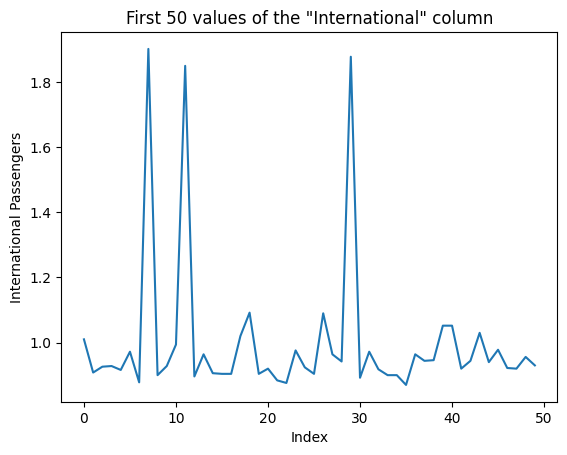

In [9]:
plt.plot(data['Consumption'].head(50))
plt.title('First 50 values of the "International" column')
plt.xlabel('Index')
plt.ylabel('International Passengers')
plt.show()

In [10]:
rolling_mean_5 = data['Consumption'].rolling(window=5).mean()

In [11]:
print("First 10 values of the rolling mean with window size 5:")
print(rolling_mean_5.head(10))

First 10 values of the rolling mean with window size 5:
0       NaN
1       NaN
2       NaN
3       NaN
4    0.9376
5    0.9300
6    0.9240
7    1.1192
8    1.1136
9    1.1160
Name: Consumption, dtype: float64


In [12]:
rolling_mean_10 = data['Consumption'].rolling(window=10).mean()

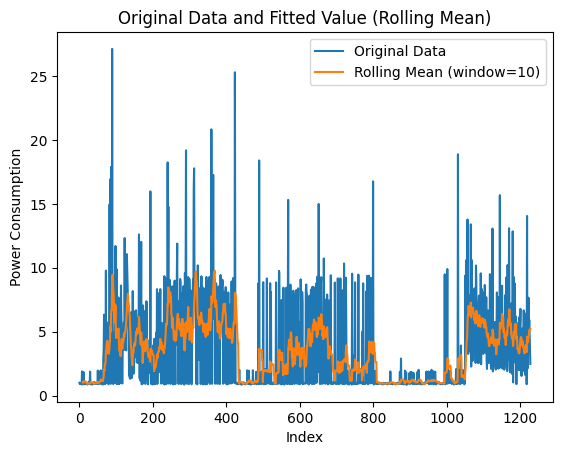

In [13]:
plt.plot(data['Consumption'], label='Original Data')
plt.plot(rolling_mean_10, label='Rolling Mean (window=10)')
plt.title('Original Data and Fitted Value (Rolling Mean)')
plt.xlabel('Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

In [14]:
lag_order = 13
model = AutoReg(data['Consumption'], lags=lag_order)
model_fit = model.fit()

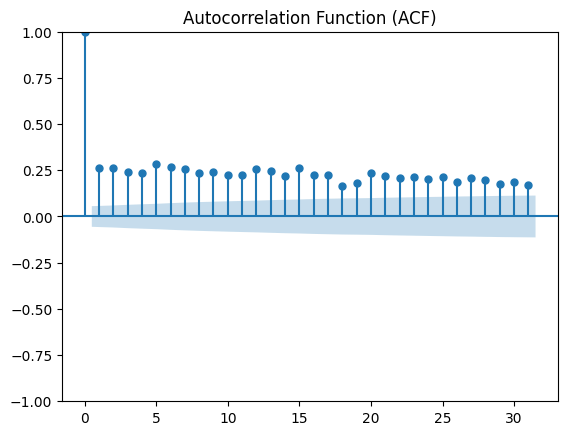

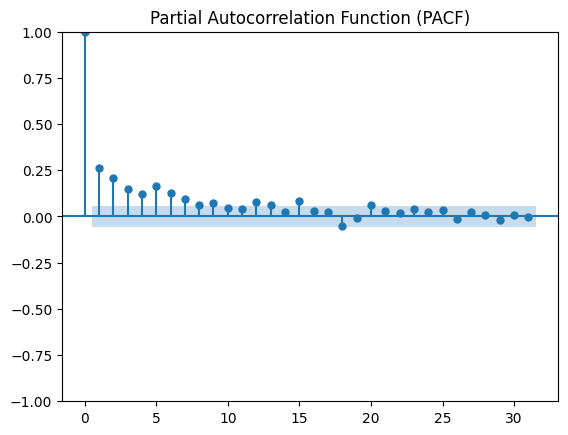

In [15]:
plot_acf(data['Consumption'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(data['Consumption'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [16]:
predictions = model_fit.predict(start=lag_order, end=len(data)-1)

In [17]:
mse = mean_squared_error(data['Consumption'][lag_order:], predictions)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 10.013264497932122


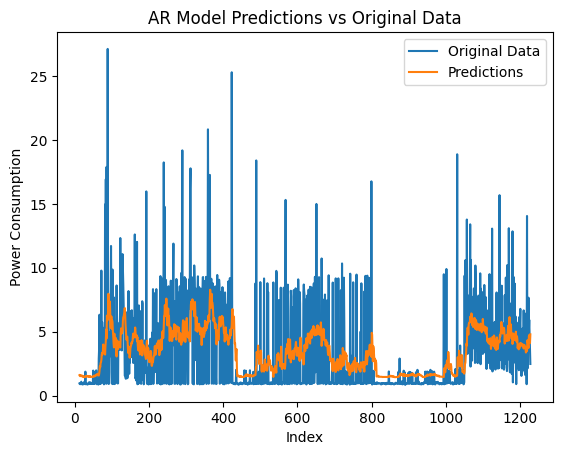

In [18]:
plt.plot(data['Consumption'][lag_order:], label='Original Data')
plt.plot(predictions, label='Predictions')
plt.title('AR Model Predictions vs Original Data')
plt.xlabel('Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()